<big>**Практикум 2.4. Принцип сжимающих отображений. Решение уравнений и систем линейных уравнений методом итераций.**</big>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import math

**Упражнение 1. Создать функции, которые вычисляют расстояние между точками <big>$R^n$</big> в различных метриках.**

In [11]:
def getMetricDistances(x, y):

    # первая метрика
    d1 = 0
    for i in range(len(x)):
        if (abs(x[i] - y[i])) > d1:
            d1 = abs(x[i] - y[i])
    print("В первой метрике:", d1)

    # вторая метрика
    d2 = 0
    for i in range(len(x)):
        d2 += abs(x[i] - y[i])
    print("Во второй метрике:", d2)

    # евклидова метрика
    d3 = 0
    for i in range(len(x)):
        d3 += (x[i] - y[i]) ** 2
    d3 = d3**0.5
    print("В евклидовой метрике:", d3)

**Проверить их работу для расстояний между точкой <big>$O(0;0)$</big> и точками <big>$A(3;4)$</big> и <big>$B(4;3)$</big>.**

In [12]:
O = [0, 0]
A = [3, 4]
B = [4, 3]
getMetricDistances(O, A)

В первой метрике: 4
Во второй метрике: 7
В евклидовой метрике: 5.0


In [13]:
getMetricDistances(O, B)

В первой метрике: 4
Во второй метрике: 7
В евклидовой метрике: 5.0


**Вычислить расстояния между точками <big>$A(1;2;3;4)$</big> и <big>$B(7;3;4;200)$</big> в различных метриках.**

In [14]:
A = [1, 2, 3, 4]
B = [7, 3, 4, 200]
getMetricDistances(A, B)

В первой метрике: 196
Во второй метрике: 204
В евклидовой метрике: 196.0969148150985


**Упражнение 2. Создать функцию, строящую изображение замкнутого шара в <big>$R^2$</big> для различных метрик.**

In [15]:
def drawMetricSphere(center, r):

    x = r - 2 * r * np.random.rand(100000) + center[0]
    y = r - 2 * r * np.random.rand(100000) + center[1]

    plt.subplots(figsize=(10, 10))

    # первая метрика
    plt.subplot(1, 3, 1)
    L = np.logical_and(
        ((abs(x - center[0])) <= r), ((abs(y - center[1])) <= r)
    )  # логический индекс для отбора значений
    plt.plot(x[L], y[L], ".")

    # параметры координатной плоскости
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.grid()
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")
    plt.xlim(center[0] - r - 2, center[0] + r + 2)
    plt.ylim(center[1] - r - 2, center[1] + r + 2)
    plt.axis("scaled")

    # вторая метрика
    plt.subplot(1, 3, 2)
    L = (abs(x - center[0])) + (abs(y - center[1])) <= r
    plt.plot(x[L], y[L], ".")

    # параметры координатной плоскости
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.grid()
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")
    plt.xlim(center[0] - r - 2, center[0] + r + 2)
    plt.ylim(center[1] - r - 2, center[1] + r + 2)
    plt.axis("scaled")

    # третья метрика
    plt.subplot(1, 3, 3)
    L = ((x - center[0]) ** 2 + (y - center[1]) ** 2) ** 0.5 <= r
    plt.plot(x[L], y[L], ".")

    # параметры координатной плоскости
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.grid()
    plt.axhline(y=0, color="k")
    plt.axvline(x=0, color="k")
    plt.xlim(center[0] - r - 2, center[0] + r + 2)
    plt.ylim(center[1] - r - 2, center[1] + r + 2)
    plt.axis("scaled")

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
    plt.show()

**Построить шары <big>$\overline{B}_{0, 1}$</big> в метриках <big>$\rho_0$</big>, <big>$\rho_1$</big>, <big>$\rho_2$</big>.**

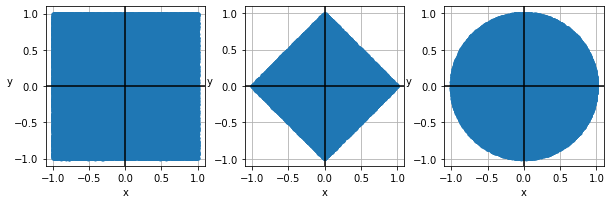

In [16]:
center_point = [0, 0]
r = 1

drawMetricSphere(center_point, r)

**Упражнение 3. Положив <big>$x_1=3$</big> вывести <big>$10$</big> первых членов последовательности <big>$x_n$</big>, заданной рекуррентной формулой <big>$x_{k+1}=tg(x_k)$</big>.**

In [17]:
x = 3
for i in range(2, 12):
    print(x)
    x = np.tan(x)

3
-0.1425465430742778
-0.14351994778492885
-0.14451354178374737
-0.14552803216462146
-0.14656416116305784
-0.14762270843290942
-0.14870449350594378
-0.14981037845185682
-0.15094127075832087


*Процесс итераций для уравнения расходится.*

**Упражнение 4. Создать функцию для решения уравнения <big>$f(x)=x$</big> с заданной точностью с выводом последовательности приближений. Входными параметрами являются функция <big>$f(x)$</big>, параметр сжатия <big>$\alpha$</big>, начальное приближение <big>$x_1$</big>, точность решения <big>$ε$</big>.**

In [18]:
def solveFunc(f, alpha, x1, epsilon):
    print(x1)
    x = f(x1)
    r0 = abs(x - x1)
    n = math.ceil((np.log(epsilon * (1 - alpha)) - np.log(r0)) / np.log(alpha))

    for i in range(n + 1):
        print(x)
        x = f(x)

**Проверить работу для уравнения из примера 2.**

In [19]:
def f(x):
    return np.arctan(x) + np.pi

solveFunc(f, 0.2884, 3, 0.001)

3
4.3906384259880475
4.4884516448912075
4.4931752502709985
4.493398404996493
4.493408936315932
4.493409433294847
4.493409456747508
4.493409457854249


**С точностью <big>$0.0001$</big> решить уравнение: <big>$x+1 = xlgx$</big>.**

**<big>$1+\frac{1}{x} = lgx$</big>**

**<big>$x = 10^{1+\frac{1}{x}}$</big>**

In [20]:
def f(x):
    return 10 ** (1 + (1 / x))

x = sp.Symbol("x")
solveFunc(f, 0.2884, 20, 0.0001)

20
11.220184543019636
12.277928326341959
12.062767718787475
12.10318619477071
12.095473427204789
12.096940840874877
12.09666149622171
12.09671466803236
12.096704546845833
12.096706473393306
12.096706106678607


**Сравнить с ответом, полученными при непосредственном решении в Python.**

In [21]:
x = sp.Symbol("x")
print(float(sp.solve(x + 1 - x * sp.log(x, 10), x)[0]))

12.096706165319809


**Упражнение 5. Записать систему уравнений в виде <big>$B+CX=X$</big>. Проверить выполнение условия сжатости матрицы <big>$C$</big>. Создать функцию для решения методом итераций системы уравнений <big>$AX=B$</big> с точностью <big>$ε$</big>, взяв в качестве начального приближения решения <big>$X_1=B$</big>. Выходные параметры: приближённое решение и количество итераций.**

In [27]:
def checkC(A, B):
    C = -A + np.eye(A.shape[0])

    condition1 = np.zeros(A.shape[0])
    condition2 = np.zeros(A.shape[0])
    condition3 = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[0]):
            condition1[i] += abs(C[i][j])
            condition2[i] += abs(C[j][i])
            condition3 += C[i][j] ** 2

    if max(condition1) < 1 or max(condition2) < 1 or condition3**0.5 < 1:
        print("Итерационный процесс сходится.")
        return True
    else:
        print("Итерационный процесс расходится.")
        return False

def solveMatrixFunc(A, B, epsilon):
    if checkC(A, B):
        C = -A + np.eye(A.shape[0])
        X = B + np.matmul(C, B)
        alpha = 0.5
        r0 = abs(X - B)
        n = (np.log(epsilon * (1 - alpha)) - np.log(r0)) / np.log(alpha)
        for i in range((math.ceil(max(map(max, n)))) + 1):
            X = B + np.matmul(C, X)
        return X

**Решить систему уравнений с точностью <big>$0.001$</big>.**

**<big>$A=$</big> 
 $\begin{pmatrix}
  1 & 0,06 & -0,02\\ 
  0,03 & 1 & -0,05\\ 
  0,01 & -0,02 & 1
\end{pmatrix}$, <big>$B=$</big> 
 $\begin{pmatrix}
  2\\ 
  3\\ 
  5
\end{pmatrix}$**

In [28]:
A = np.array([[1, 0.06, -0.02], [0.03, 1, -0.05], [0.01, -0.02, 1]])
B = np.array([[2], [3], [5]])

print(solveMatrixFunc(A, B, 0.001))

Итерационный процесс сходится.
[[1.90919828]
 [3.19496442]
 [5.04480731]]


**Проверить решение подстановкой.**

In [9]:
ans = np.array([[1.90919828], [3.19496442], [5.04480731]])
print(np.matmul(A, ans))

[[2.]
 [3.]
 [5.]]
